# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
cmpD=study_data_complete
grpD = cmpD.groupby('Drug Regimen')["Tumor Volume (mm3)"]


pd.DataFrame({
    'Mean Tumor Volume': grpD.mean(),
    'Median Tumor Volume': grpD.median(),
    'Tumor Volume Variance': grpD.var(),
    'Tumor Volume Std. Dev.': grpD.std(),
    'Tumor Volume Std. Err.': grpD.sem()
})


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_grp = grpD.agg(['mean', 'median', 'var', 'std', 'sem'])    

# This method produces everything in a single groupby function
agg_grp

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

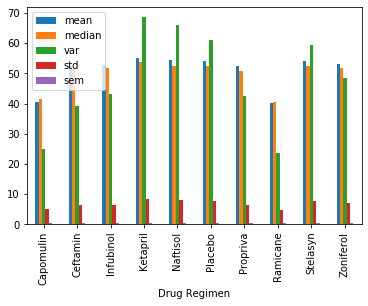

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
agg_grp.plot(kind='bar')

In [5]:
agg_grp['mean']

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: mean, dtype: float64

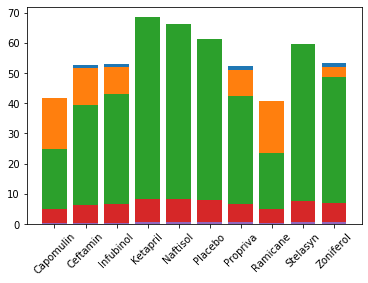

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(agg_grp.index.array, agg_grp['mean'])
plt.bar(agg_grp.index.array, agg_grp['median'])
plt.bar(agg_grp.index.array, agg_grp['var'])
plt.bar(agg_grp.index.array, agg_grp['std'])
plt.bar(agg_grp.index.array, agg_grp['sem'])

plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Number of Data Points')

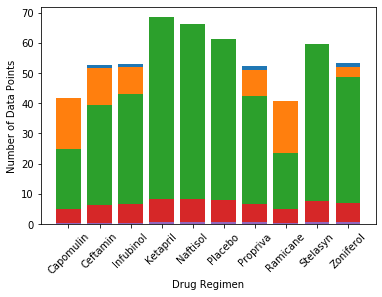

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(agg_grp.index.array, agg_grp['mean'])
plt.bar(agg_grp.index.array, agg_grp['median'])
plt.bar(agg_grp.index.array, agg_grp['var'])
plt.bar(agg_grp.index.array, agg_grp['std'])
plt.bar(agg_grp.index.array, agg_grp['sem'])

plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")



In [8]:
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [9]:
mouseD=mouse_metadata.groupby("Sex").count()["Mouse ID"]

In [10]:
mouseD

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

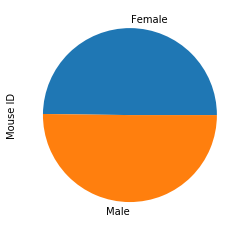

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseD.plot(kind='pie')


## Quartiles, Outliers and Boxplots

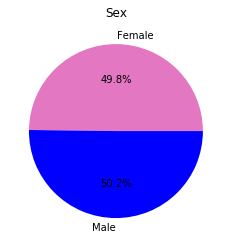

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    mouseD,
    labels=mouseD.index.values, 
    autopct='%1.1f%%',
    textprops={'color': 'black'},
    colors=['C6', 'b']
    )

plt.title('Sex')

plt.savefig('Sex_Ratio.png')

plt.show()

In [13]:
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_max=study_data_complete.groupby('Mouse ID').max().reset_index()
mouse_timepoint_max=tumor_max[['Mouse ID', 'Timepoint']].merge(study_data_complete,on=['Mouse ID', 'Timepoint'], how='left')

mouse_timepoint_max

# Start by getting the last (greatest) timepoint for each mouse
capomulin = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
infubinol = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
ramicane = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
ceftamin = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

Mouse_combined = mouse_timepoint_max[['Mouse ID','Tumor Volume (mm3)']].loc[mouse_timepoint_max['Drug Regimen'].isin(['Capomulin','Infubinol','Ramicane','Ceftamin'])]
Mouse_combined_vol = Mouse_combined.groupby('Mouse ID' ,as_index=False)['Tumor Volume (mm3)'].agg({'Last':'last'})
del Mouse_combined_vol['Mouse ID']
Mouse_combined_vol_list =  Mouse_combined_vol['Last']

quartiles =Mouse_combined_vol_list.quantile([.25,.5,.75])
lowQ = quartiles[0.25]
upQ = quartiles[0.75]
iqr = upQ-lowQ
print(f"The lower quartile of Tumor Volume (mm3) is: {lowQ}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upQ}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The  median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
low_bound = lowQ - (1.5*iqr)
up_bound = upQ + (1.5*iqr)
print(f"Values below {low_bound} could be outliers.")
print(f"Values above {up_bound} could be outliers.")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint|

# Quantitatively determine capomulin outliers


The lower quartile of Tumor Volume (mm3) is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) is: 22.74251795250001
The  median of Tumor Volume (mm3) is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


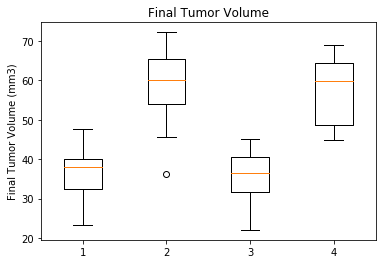

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - needs to be a list of lists where ea list would be the data for each box plot
drug = [capomulin, infubinol, ramicane, ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug)
plt.show()

## Line and Scatter Plots

In [21]:
mouse_m601.loc[mouse_m601['Drug Regimen']=='Capomulin']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
249,m601,0,45.000000,0,Capomulin,Male,22,17
312,m601,5,41.408591,1,Capomulin,Male,22,17
606,m601,10,36.825367,1,Capomulin,Male,22,17
870,m601,15,35.464612,1,Capomulin,Male,22,17
1089,m601,20,34.255732,1,Capomulin,Male,22,17
1185,m601,25,33.118756,1,Capomulin,Male,22,17
1359,m601,30,31.758275,1,Capomulin,Male,22,17
1512,m601,35,30.834357,1,Capomulin,Male,22,17
1656,m601,40,31.378045,1,Capomulin,Male,22,17
1843,m601,45,28.430964,1,Capomulin,Male,22,17


In [28]:
y_axis

0     41.963636
1     40.083699
2     36.505973
3     41.990097
4     44.613344
5     44.805810
6     39.141053
7     44.465236
8     43.216925
9     44.434474
10    42.507261
11    34.847470
12    39.049816
13    45.798970
14    36.509212
15    43.367364
16    34.559143
17    42.803733
18    39.328725
19    39.887495
20    41.581595
21    41.384825
22    41.352452
23    36.182040
24    38.506829
Name: Mean, dtype: float64

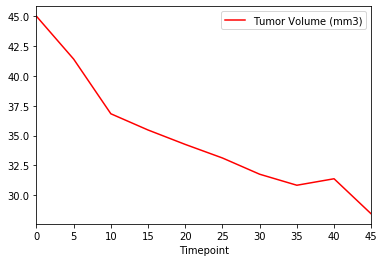

In [23]:
#vreate mearged data set - do the merged then the groupby
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin -%matplotlib in line to make it not show
mouse_m601 =study_data_complete.loc[study_data_complete['Mouse ID']=='m601']
mouse_m601.loc[mouse_m601['Drug Regimen']=='Capomulin'].plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',color='red')


In [27]:
cap_vol

,Tumor Volume (mm3),Mouse ID
0,45.000000,b128
226,45.000000,j246
227,45.000000,r554
228,45.000000,s185
229,45.000000,b742
...,...,...
1854,40.728578,s710
1859,38.125164,j119
1878,47.685963,i557
1888,41.581521,r944


C:\Users\kehoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.
C:\Users\kehoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  if __name__ == '__main__':


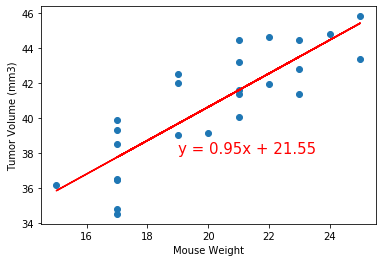

In [25]:
#when I create the other variable - then I can update this with the same variable (instead of mouse_timepoint_max)
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_weight = study_data_complete[['Weight (g)','Mouse ID']].loc[study_data_complete['Drug Regimen']=='Capomulin']
x_axis = cap_weight.groupby(['Mouse ID'])['Weight (g)'].agg({'Weight':'first'})
x_axis = x_axis['Weight']
x_axis = x_axis.reset_index()
x_axis = x_axis["Weight"]
cap_vol = study_data_complete[['Tumor Volume (mm3)','Mouse ID']].loc[study_data_complete['Drug Regimen']=='Capomulin']
y_axis = cap_vol.groupby(['Mouse ID'])['Tumor Volume (mm3)'].agg({'Mean':np.mean})
y_axis = y_axis.reset_index()
y_axis = y_axis['Mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(19,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# round this!

print(f"The correlation between mouse weight and average tumor volume is {rvalue}")


The correlation between mouse weight and average tumor volume is 0.8419363424694718
